# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving haberman.csv to haberman.csv


In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 

warnings.filterwarnings("ignore") 

'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")


In [38]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


In [39]:
#(Q) What are the column names in our dataset?
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [40]:
#(Q) How many data points for each class are present? 
#(or) How many patients survived/deceased after the treatment?

haberman["status"].value_counts()
# balanced-dataset vs imbalanced datasets
#Haberman is an imbalanced dataset as the number of data points for both classes are significantly different.

1    225
2     81
Name: status, dtype: int64

*  Objective: Classify whether a new patient will survive or not after the treatment.

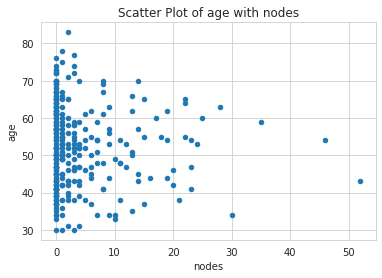

In [41]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='nodes', y='age') ;
plt.title("Scatter Plot of age with nodes")
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/patient's survival.

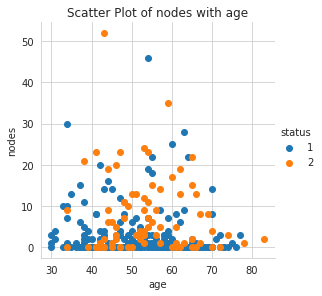

In [42]:
# 2-D Scatter plot with color-coding for each patient's survival,deceased/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("Scatter Plot of nodes with age")
plt.show();

# Blue and orange data points cannot be easily seperated.
# We draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 3C2 = 3.

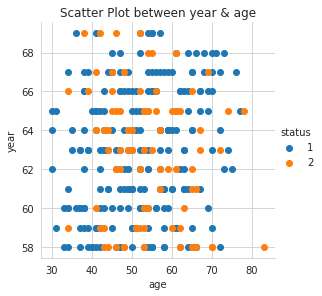

In [43]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", size=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title("Scatter Plot between year & age")
plt.show();

# Blue and orange data points cannot be easily seperated again

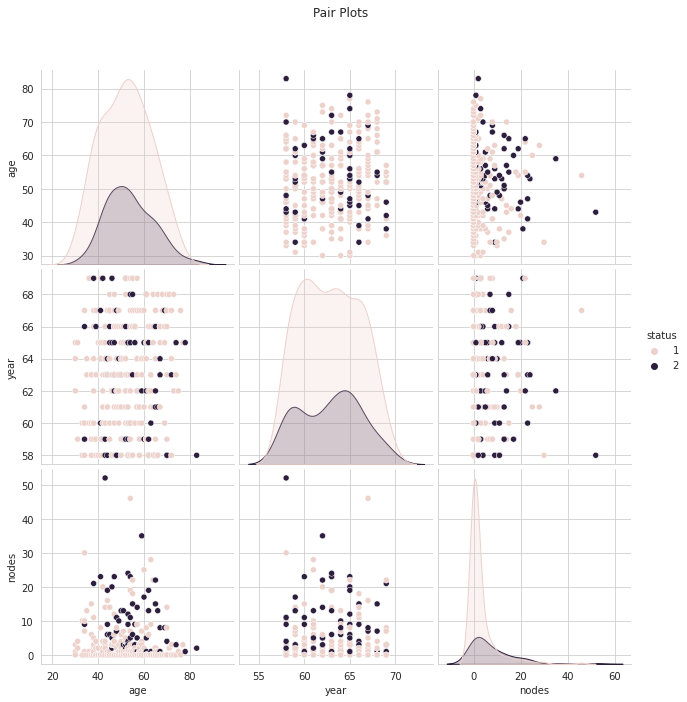

In [44]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
g = sns.pairplot(haberman, hue="status", size=3);
g.fig.suptitle("Pair Plots", y=1.08) # y= some height>1
plt.show()

**Observations**
1. None of the 3 features(age,nodes,year) are linearly separable.


# Histogram, PDF, CDF

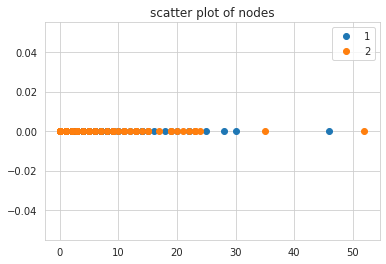

In [45]:
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];

plt.plot(haberman_1["nodes"], np.zeros_like(haberman_1['nodes']), 'o')
plt.plot(haberman_2["nodes"], np.zeros_like(haberman_2['nodes']), 'o')
plt.title("scatter plot of nodes")
plt.legend("12")

plt.show()

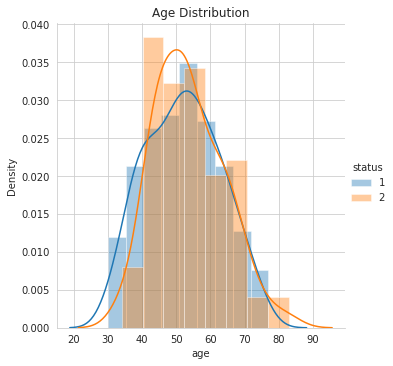

In [46]:
#1-D scatter plot of age
import numpy as np
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Age Distribution")
plt.show();

**Observations**
1. Here the age for patients who did not survive post operation is normally distributed.
2. Status 1&2 are not visually separable using the age feature.
3. Age lies mostly in the interval 30-75.


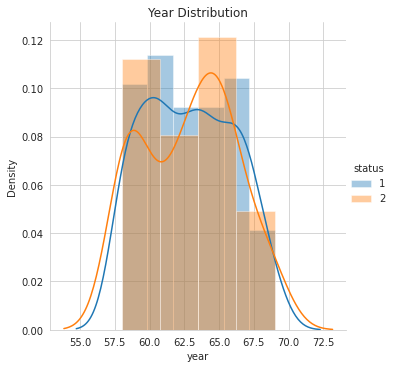

In [47]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("Year Distribution")
plt.show();

1. Status 1&2 here also are not visually separable using the feature year.

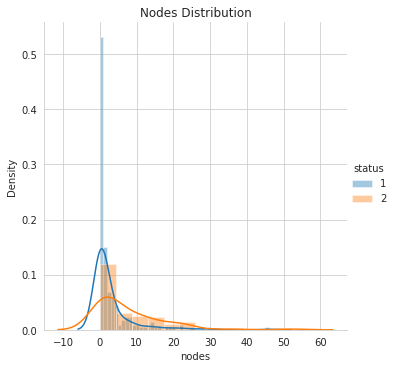

In [48]:
sns.FacetGrid(haberman, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Nodes Distribution")
plt.show();

**Observations**
1. If nodes are close to 0 then chances of survival after operation are highest.
2. Chances of fatality are more than survival if nodes > 3 and if nodes < 3, then chances of survival is more.
3. As no of nodes increases both patient's survival rate and fatality rate decreases. Survival rate declines more sharply than fatality rate.


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


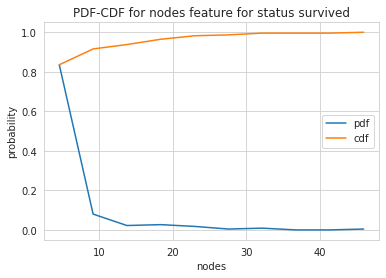

In [55]:
#Plot CDF of nodes

counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.xlabel("nodes")
plt.ylabel("probability")
plt.title("PDF-CDF for nodes feature for status survived")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(["pdf","cdf"])

Observations
1. Approx 84% survival rate is there when operation is done on a patient having less than 5 nodes.
2. When nodes > 30, chances of survival almost drops to 0.


[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


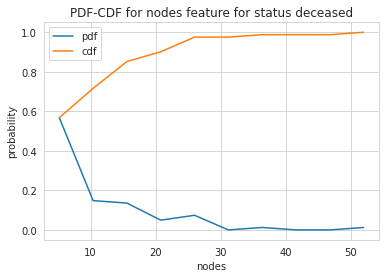

In [56]:
counts, bin_edges = np.histogram(haberman_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.xlabel("nodes")
plt.ylabel("probability")
plt.title("PDF-CDF for nodes feature for status deceased")
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.legend(["pdf","cdf"])

Median, Percentile, Quantile, MAD

In [28]:
print("\nMedians:")
print(np.median(haberman_1["nodes"]))
print(np.median(haberman_2["nodes"]))

print("\nQuantiles:")
print(np.percentile(haberman_1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_1["nodes"],90))
print(np.percentile(haberman_2["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_1["nodes"]))
print(robust.mad(haberman_2["nodes"]))


Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


Observations
1. Median of nodes is 0 for patients who have survived and 4 who did not. This is in agreement with the fact that more early a patient goes through operation, better are his/her chances of survival.
2. 75% of the patients who survived have gone through operation when nodes were 0, whereas 75% of patients who died went through operation when nodes were 4.
3. MAD(Survived) < MAD(Not_Survived)
This means for survived patients spread of data is less as most of them went through operation when node was close to 0. For not survived spread is far more as most of them went through operation when they already had developed certain number of nodes within their bodies.

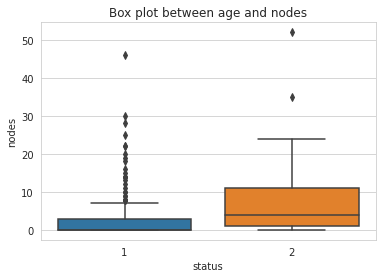

In [26]:

sns.boxplot(x='status',y='nodes', data=haberman)
plt.title("Box plot between age and nodes")
plt.show()

Observations
1. Interquartile range(25-75) is much smaller and starts from 0 nodes for survived patients in comparison to the patients who have not survived.

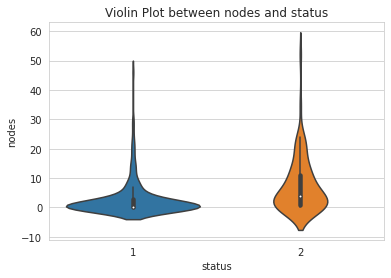

In [27]:
sns.violinplot(x="status", y="nodes", data=haberman, size=8)
plt.title("Violin Plot between nodes and status")
plt.show()

 Observation
1. For survived we can see density is more around 0 nodes and whiskers lie in the range 0-6 whereas for deceased patients density is more around 2-3 nodesand whiskers lie in the range 0 to 25.

# Conclusions

1. Patient's age and operation year cannot be deciding factors for his/her survival.
2. Survival chance is inversely proportional to the no of nodes.
3. 